<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  

# El indicador técnico "Convergencia/Divergencia de Medias Móviles"

**Descripción:** Cálcular el indicado Técnico (MACD).  

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|22 de junio 2020|

---
**¿QUÉ ES EL MACD?**  

La divergencia / convergencia de la media móvil (MACD, por sus siglas en inglés) es un indicador técnico que simplemente mide la relación de los promedios móviles exponenciales (EMA, en inglés). El MACD implica una línea del MACD (azul), una línea de señal (rojo) y un histograma (verde / rojo), que muestra la diferencia entre la línea MACD y la línea de señal.  

La línea MACD es la diferencia entre dos promedios móviles exponenciales, generalmente de 12 y 26 períodos, mientras que la línea de señal es generalmente un promedio exponencial suavizadode 9 períodos de la línea MACD.

Estas líneas MACD fluctúan alrededor de la línea cero. Esto quiere decir que el MACD se comporta como un oscilador,capaz de indicar señales de sobrecompra y sobreventa por medio de su posición por encima o por debajo de la línea cero, respectivamente.  

El MACD mide el impulso o la fuerza de una tendencia utilizando la línea MACD y la línea cero como puntos de referencia:  

Cuando la línea MACD cruza por encima de la línea cero, esto indica una tendencia alcista  
Cuando la línea MACD cruza por debajo la línea cero, esto indica una tendencia bajista  
Además, el MACD también proporciona señales de órdenes de compra o venta a través de los cruces entre las dos líneas que componen al MACD:  

Cuando la línea MACD cruza por encima de la línea de señal, los operadores usan esto como una señal de COMPRA  
Cuando la línea MACD cruza por debajo de la línea de señal, los traders lo interpretan como una señal de VENTA  

---

### Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly
#import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go

### Carga del dataset

In [21]:
df = pd.read_csv('AAPL.csv',index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


### Graficar los datos

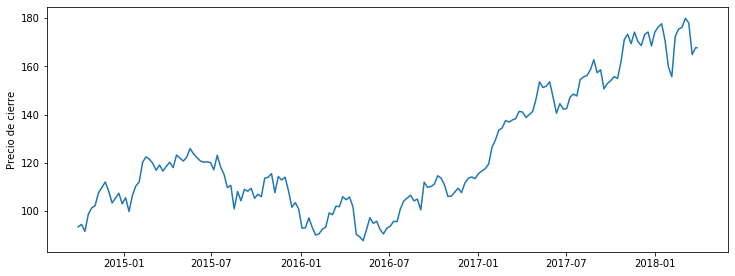

In [23]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Adj Close'])
plt.ylabel('Precio de cierre')
plt.show()

### Calculo MACF y el signal line

In [31]:
shortEMA = df['Adj Close'].ewm(span= 12, adjust= False).mean()
longEMA = df['Adj Close'].ewm(span= 26, adjust= False).mean()

In [33]:
MACD = shortEMA - longEMA
signal = MACD.ewm(span = 9, adjust = False).mean()

In [34]:
df['MACD'] = MACD
df['signal'] = signal
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,signal
Date,,,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.083119,0.016624
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.081848,-0.003071
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.355201,0.068584
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.901747,0.235216


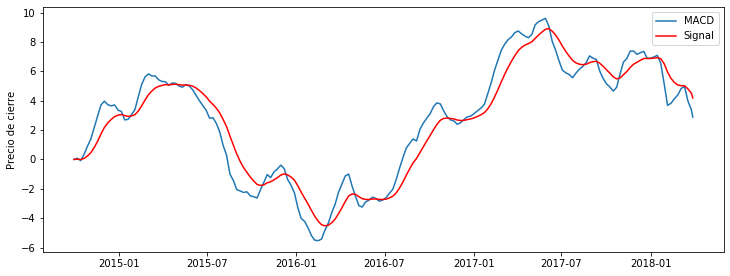

In [37]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.MACD,label= 'MACD')
plt.plot(df['signal'],label= 'Signal', color ='red')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()